In [7]:
from Hodgkin_Huxley_model import initial_values, HH_model_derivs, g_L, g_K, g_Na, E_L, E_K, E_Na, C_m
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [56]:
def plot_result(res, figsize):
    fig = plt.figure(1, figsize=figsize)

    # Plot V as a function of time
    ax1 = fig.add_subplot(411)
    ax1.plot(t, res[:,0])
    ax1.set_xlabel('time')
    ax1.set_ylabel('V')

    # Plot n as a function of time
    ax2 = fig.add_subplot(412)
    ax2.plot(t, res[:,1])
    ax2.set_xlabel('time')
    ax2.set_ylabel('n, m, h')

    # Plot m as a function of time
    ax2 = fig.add_subplot(412)
    ax2.plot(t, res[:,2])

    # Plot h as a function of time
    ax2 = fig.add_subplot(412)
    ax2.plot(t, res[:,3])

    I = [I_func(cur_t) for cur_t in t]
    # Plot I as a function of time
    ax2 = fig.add_subplot(413)
    ax2.plot(t, I)
    ax2.set_xlabel('time')
    ax2.set_ylabel('I')

    # Plot V vs n
    ax3 = fig.add_subplot(414)
    ax3.plot(res[:,0]%twopi, res[:,1], '.', ms=1)
    ax3.set_xlabel('V')
    ax3.set_ylabel('n, m, h')

    # Plot V vs m
    ax3 = fig.add_subplot(414)
    ax3.plot(res[:,0]%twopi, res[:,2], '.', ms=1)

    # Plot V vs h
    ax3 = fig.add_subplot(414)
    ax3.plot(res[:,0]%twopi, res[:,3], '.', ms=1)

    ax3.set_xlim(np.min(res[:, 0]), np.max(res[:, 0]))
    plt.tight_layout()
    plt.show()

# First simulation

In [57]:
current = [5, 15, 36, 49]
duration = [30, 60, 20, 88]
gap = 50

In [58]:
def I_func(t):
    for i in range(4):
        if t < duration[i]:
            return current[i]/1000
        else:
            t -= duration[i]
            if t < gap:
                return 0
            else:
                t -= gap
    return 0

In [59]:
tStop = 400
tInc = 1
t = np.arange(0., tStop, tInc)

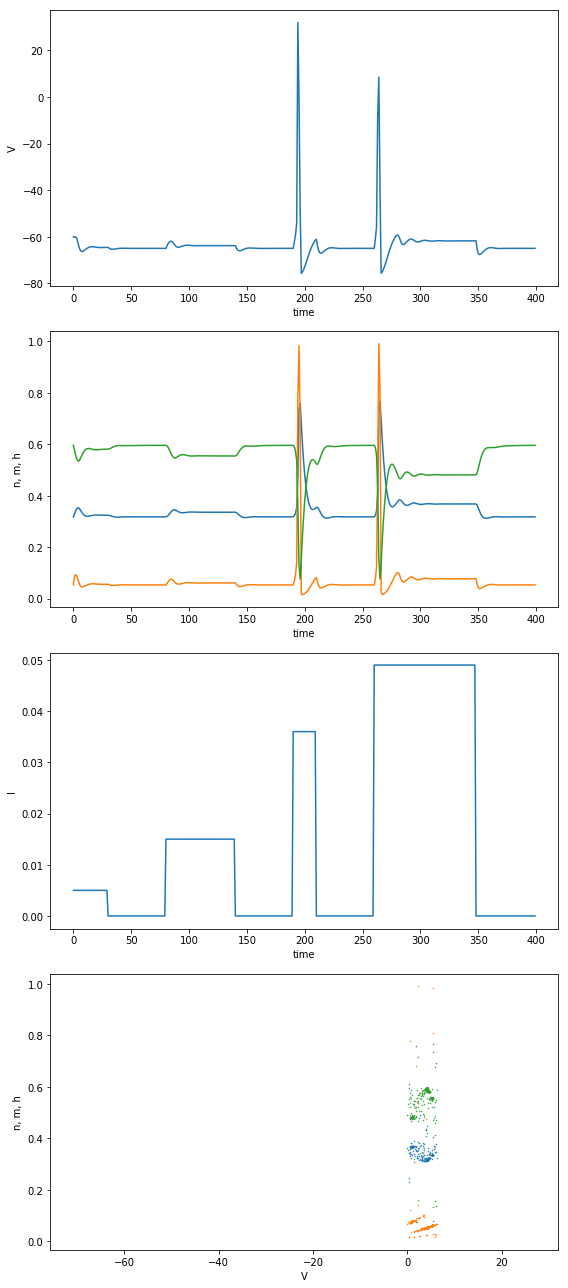

In [60]:
params = [g_L, g_K, g_Na, E_L, E_K, E_Na, C_m, I_func]
res = odeint(HH_model_derivs, initial_values, t, args=(params,))
plot_result(res, (8,18))

# Second simulation

In [61]:
current = [60, 180]
duration = 1
gap = 1

In [62]:
def I_func(t):
    t_int = np.ceil(t)
    if t_int % 2 == 0:
        return 0
    if t_int % 4 == 3:
        return current[1]/1000
    if t_int % 4 == 1:
        return current[0]/1000

In [63]:
tStop = 200
tInc = 1
t = np.arange(0., tStop, tInc)

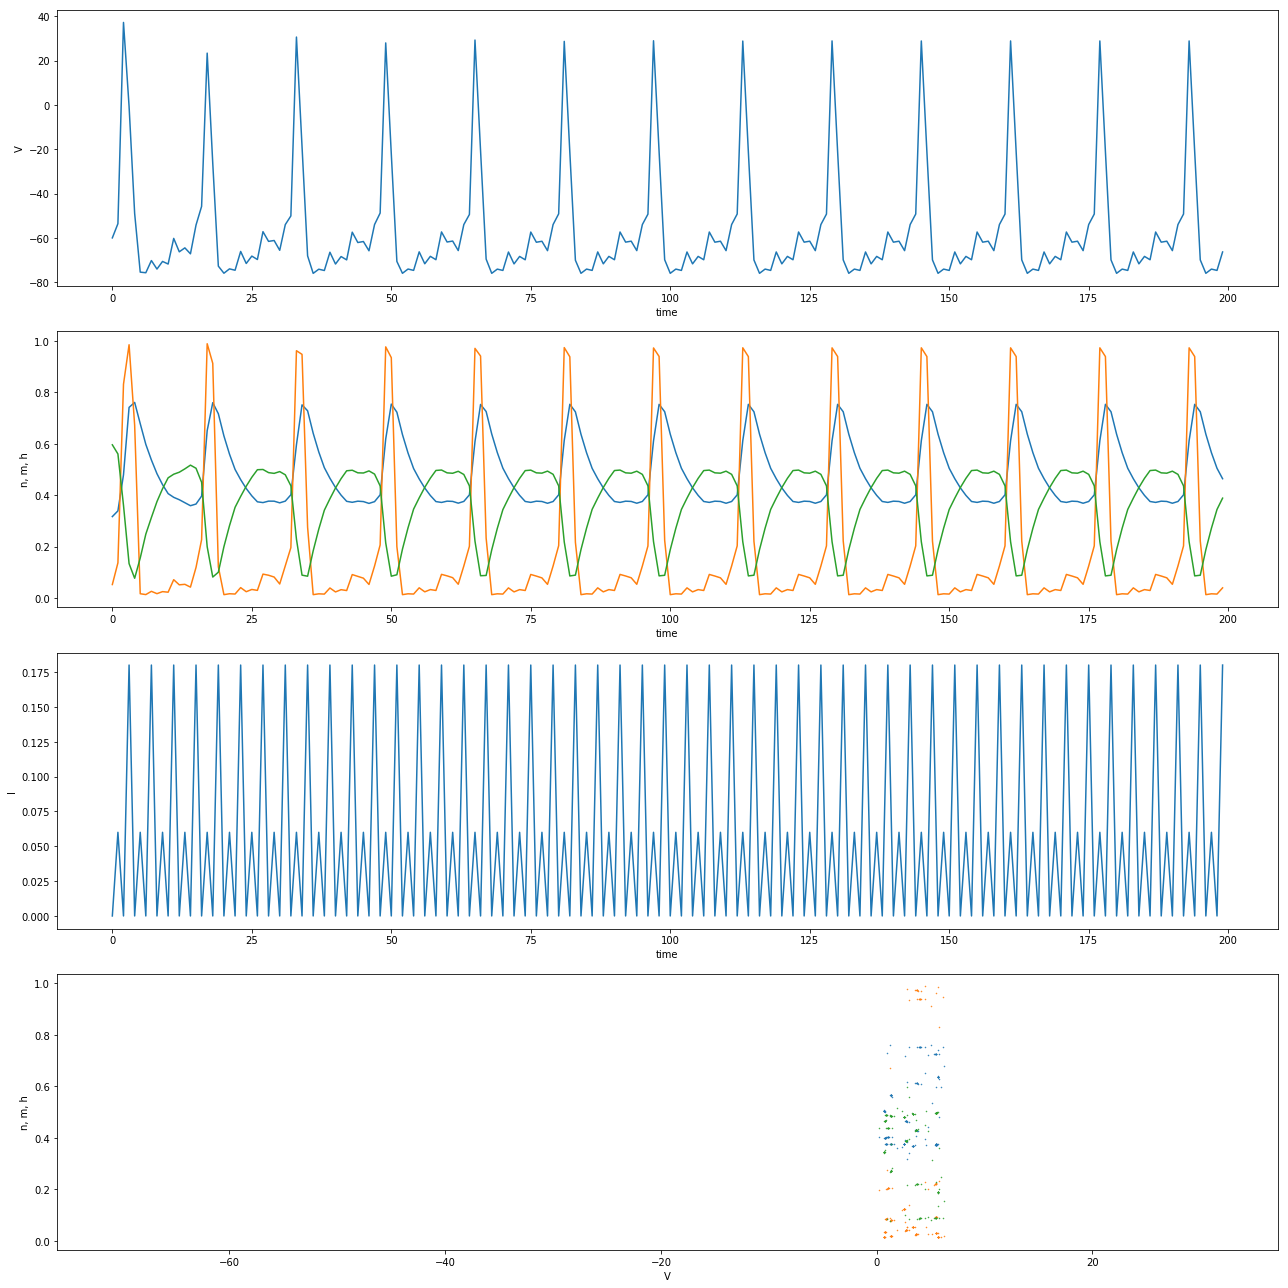

In [64]:
params = [g_L, g_K, g_Na, E_L, E_K, E_Na, C_m, I_func]
res = odeint(HH_model_derivs, initial_values, t, args=(params,))
plot_result(res, (18, 18))

# Conclusion

1. Амплитуда разницы потанциалов не превышает амплитуды тока -- пока ток постоянен, возбуждения не происходит. Но при этом оно происходит только при увеличении тока до какого-то определенного значения. Если ток увеличился, но это значение не достигнуто, нейрон не возбуждается.
2. Нет?